## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: [Norhan Reda Abdelwahed Ahmed]  
   **ID**: `9203639` 

2. **Name**: [Hoda Gamal Hamouda Ismail]  
   **ID**: `9203673` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities or post on the classroom.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!





## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the project requirements and are properly documented in your submission.


## Maximum Likelihood Estimator (MLE) Classifier
The Maximum Likelihood Estimator (MLE) is a fundamental statistical approach used to infer the parameters of a given distribution that are most likely to result in the observed data. In the context of image classification, MLE helps to quantify the probability of observing the data within each predefined class based on their distinct statistical properties. This method is highly effective for classifying images into categories by comparing the likelihoods of the data under different model parameters, enabling the most probable class assignment.

1. **Calculate Class Priors**: Estimate the probability of each class based on the training dataset. This is expressed as:
   $$
   P(C_k) = \frac{N_k}{N}
   $$
   where \(N_k\) is the number of samples of class \(k\) and \(N\) is the total number of samples.

2. **Estimate Class-specific Parameters**: For each class, estimate parameters such as the mean \(\mu_k\) and covariance \(\Sigma_k\) of features that describe the distribution of the data:
   $$
   \mu_k = \frac{1}{N_k} \sum_{x \in C_k} x
   $$
   $$
   \Sigma_k = \frac{1}{N_k} \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
   $$

3. **Compute Likelihoods**: For a given test instance \(x\), compute the likelihood of that instance belonging to each class using the estimated parameters:
   $$
   p(x | C_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
   $$

4. **Classify Based on Maximum Likelihood**: Assign the class label to each test instance based on the highest likelihood, which can be calculated as:
   $$
   \hat{y} = \arg\max_{k} P(C_k) \cdot p(x | C_k)
   $$

The Naive Bayes classifier is perhaps the most well-known application of the Maximum Likelihood Estimator principle in classification tasks. It assumes that the features in each class are independent, simplifying the computation of likelihoods. While Naive Bayes is popular for its simplicity and efficiency, it is not the only technique that leverages the MLE approach. Other classical alternatives include Logistic Regression, which applies MLE to estimate the parameters that best predict categorical outcomes, and Gaussian Mixture Models, which use MLE to estimate the parameters of multiple Gaussian distributions within the data. Students are encouraged to explore these models to gain a deeper understanding of statistical estimation techniques.


## Req- Image Classification for EuroSATallBands
Image classification is a key challenge in satellite imaging and remote sensing. As discussed in the lecture, this task is typically conducted on a pixel-wise basis because a single image can contain multiple textural elements of different celestial features. However, for this specific assignment, we will focus on identifying the dominant phenomena in the image as the basis for classification.

- **Load the Images**: Load the images of the EuroSAT dataset that belong to the **residential**, **river**, and **forest** classes.

- **Split the Dataset**: Split the dataset such that 10% of each class is used as testing data, and the remainder is used for training your classifier. Use the indices provided by `np.random.choice` with seed set to `27`. **Code is provided do not change it**.

- **Feature Extraction**: Extract suitable features from the images that you think might be relevant in distinguishing each class from the others. Keep in mind the curse of dimensionality when selecting features.

- **Implement a Maximum Likelihood Estimator (MLE)**: Implement a Maximum Likelihood Estimator (MLE) based on your training data. 
- **Report Accuracy and Average F1 Score**: After testing your classifier on the test set, report the **Accuracy** and **Average F1 Score** of your model.


In [1]:
# Add your libraries here
import numpy as np
from skimage import io
import os
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
# DO NOT CHANGE THIS CELL
## Training set indices.
np.random.seed(27)  # Set random seed for reproducibility

# Randomly select indices for the test sets for each class
residential_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
forest_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
river_test_indices = np.random.choice(np.arange(2500), size=250, replace=False)


In [3]:
# Follow the steps 
print(residential_test_indices )


[1748 1976 2825 1611  404  502  843 2977 1657  168 2972 2989   88  110
 1853 1121 2640 1075 2398 1705  809 1231  466 2068 1545  713 1780  493
 1884 2118 2020 1097 1601 1610 1456 1394 2472  602 1617 2809  706 2641
  592  108  351 1752  401 1233 2269  393 1720   64 2883 2504  828 2837
  293   75 2584 1994  289 1903  615 1005 1700 2770  389  472 2686   43
 1528  232  500 2819 1852 1531 2084 1498 1722 2387  877  601 1640  583
 2209 1536 2939 1411 1057 2391 2918   45  253 1189 2488 2991  366 2214
 1638  710  529  211 2028  418 2895 2548 2364  195  552 1192 1403 1653
  468 2956 1949 2901 2854 2047  632 1261 2790  188 1726 2151 2396 1204
 1494 2145  489 2846 2355 2104 1627 2228 2194 1733  691 2434  823 2799
 2291 1584 2802  819  674   95  985 1093  642 1644 2539 1408 2656 2751
 2927 2574  643  191 1680 2486 2630 1489 1918 1119 2162  955 1905 1191
 1571  785 1407  395 2832  203 2362  438 2468 2378 2661 1220 1459 1254
  735 1225 1386  378 1018 1523 2739  867  423  202 1755 1108 2764  420
 2881 

# Load the Images

In [4]:
dataset_folder = "D:/Astudy/fourth year/second term/satellite imagery/dataset/EuroSATallBands/EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif" 
classes = ["Residential", "River", "Forest"]
images_by_class = {}
my_img = None
residual_labels =[]
river_labels = []
forest_labels = []
for class_name in classes:
  
    class_folder = os.path.join(dataset_folder, class_name)
    if os.path.exists(class_folder):
        
        images_by_class[class_name] = []
        for image_file in os.listdir(class_folder):
            
            image_path = os.path.join(class_folder, image_file)
            image = io.imread(image_path)
            # my_img = image
            image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
           
            #73
            #811
            # new_img=[]
            # vegetation_index = (image[:,7]-image[:,3])/(image[:,7]+image[:,3])
            # denominator = image[:, 7] + image[:, 3]
            # mask = denominator != 0
            # vegetation_index = np.zeros_like(denominator)
            # vegetation_index[mask] = (image[mask, 7] - image[mask, 3]) / denominator[mask]

            # denominator = image[:, 8] + image[:, 11]
            # mask = denominator != 0
            # motiure_index = np.zeros_like(denominator)
            # motiure_index[mask] = (image[mask, 8] - image[mask, 11]) / denominator[mask]

            # # vegetation_index = vegetation_index.reshape(-1, 1)
            # image = np.insert(image, 13, vegetation_index, axis=1)
            # image = np.insert(image, 14,motiure_index, axis=1)
            # print(image.shape)
            # break
            # for pixel in image:
            #      vegetation_index = (pixel[7]-pixel[3])/(pixel[7]+pixel[3])
            #     #  print(vegetation_index)
            #     #  pixel.append(vegetation_index)
            #      pixel = np.append(pixel,vegetation_index)
            #      new_img.append(pixel)
            #     #  print(pixel.shape)
            #     #  break
            # # image.append(vegetation_index) 
            
            images_by_class[class_name].append(image)
            if class_name == "Residential":
                residual_labels.append("Residential")
            elif class_name == "River":
                river_labels.append("River")
            elif   class_name == "Forest": 
                forest_labels.append("Forest")
                




residential_images = np.array(images_by_class["Residential"])

river_images = np.array(images_by_class["River"])

forest_images = np.array(images_by_class["Forest"])


print(residential_images.shape)



(3000, 4096, 13)


In [5]:
print(len(residual_labels))
print(len(river_labels))
print(len(forest_labels))

3000
2500
3000


 # Split the Dataset

In [6]:
print(len(residential_images))
print(len(river_images))
print(len(forest_images))



# print(residential_test_indices)
test_residual = residential_images[residential_test_indices]
test_river = river_images[river_test_indices]
test_forest =  forest_images[forest_test_indices]

# print(test_residual)
# Generate the training indices by excluding the test indices
residential_training_indices = np.setdiff1d(np.arange(3000), residential_test_indices)
forest_training_indices = np.setdiff1d(np.arange(3000), forest_test_indices)
river_training_indices = np.setdiff1d(np.arange(2500), river_test_indices)

train_residual = residential_images[residential_training_indices]
train_river = river_images[river_training_indices]
train_forest =forest_images[forest_training_indices]

residual_labels = np.array(residual_labels)
river_labels = np.array(river_labels)
forest_labels = np.array(forest_labels)

test_residual_labels = residual_labels[residential_test_indices]
test_river_labels = river_labels[river_test_indices]
test_forest_labels =  forest_labels[forest_test_indices]

train_residual_labels = residual_labels[residential_training_indices]
train_river_labels = river_labels[river_training_indices]
train_forest_labels =forest_labels[forest_training_indices]

print(train_residual.shape)
print(train_river.shape)
print(train_forest.shape)


3000
2500
3000
(2700, 4096, 13)
(2250, 4096, 13)
(2700, 4096, 13)


In [7]:
print(train_residual.shape[0])
print(train_river.shape)
print(train_forest.shape)


2700
(2250, 4096, 13)
(2700, 4096, 13)


# Feature Extraction

# Implement a Maximum Likelihood Estimator (MLE)

In [8]:
def get_Class_Priors(train_residual,train_forest,train_river):
  total_len = train_forest.shape[0] + train_residual.shape[0] + train_river.shape[0]
  p_residual =  train_residual.shape[0]/total_len
  p_river =  train_river.shape[0]/total_len
  p_forest = train_forest.shape[0]/total_len

  return p_residual,p_river,p_forest

p_residual,p_river,p_forest = get_Class_Priors(train_residual,train_forest,train_river)
print("p_residual: ",p_residual)
print("p_river: ",p_river)
print("p_forest: ",p_forest)

print("sum prob: ",p_forest+p_residual+p_river)

p_residual:  0.35294117647058826
p_river:  0.29411764705882354
p_forest:  0.35294117647058826
sum prob:  1.0


In [9]:
def Estimate_Class_specific_Parameters(class_array):
    images_mean = np.zeros(class_array[0].shape[1])
    for i in range(class_array.shape[0]):
        image = class_array[i]
        image_mean =  np.mean(image, axis=0)
       
        images_mean += image_mean
    # print(images_mean)
    class_mean = images_mean/ class_array.shape[0]
    # new_image = []
    new_image = np.zeros((class_array[0].shape[1], class_array[0].shape[1]))
    for i in range (class_array.shape[0]):
        x_minus_mean = []
        image = class_array[i]
        for pixel in image: 
            new_val = np.array(pixel-class_mean)
            new_val_mul = np.outer(new_val ,new_val) 
            # print(new_val_mul)
            # print(new_val_mul.shape )
            # break
            # new_image.append( new_val_mul )
            new_image += new_val_mul
        # new_image.append(x_minus_mean)    
        # print("x_minus mean",x_minus_mean[0])
        # print("x",pixel)
        # break
    # sum = np.sum(new_image,axis=1)  
    class_covariance =   new_image / (class_array.shape[1]*class_array.shape[0])
    # print(new_image)
    # print(class_mean)
    # print(class_array.shape[0])
    # print(class_array[0].shape[1])
    return class_mean  ,  class_covariance     

residual_mean ,residula_covariance= Estimate_Class_specific_Parameters(train_residual)
river_mean,river_covariance = Estimate_Class_specific_Parameters(train_river)
forest_mean ,forest_covariance = Estimate_Class_specific_Parameters(train_forest)


print("residual_mean",residual_mean)
print("residual_covariance",residula_covariance)

print("river_mean",river_mean)
print("river_covariance",river_covariance)

print("forest_mean",forest_mean)
print("forest_covariance",forest_covariance)
    

residual_mean [1459.61242793 1214.69271783 1114.49102286 1075.57527226 1287.8791107
 1980.4978606  2286.60519052 2186.58596354  664.42014061   12.281757
 1974.84656675 1382.01246672 2469.38278881]
residual_covariance [[ 3.57945829e+04  3.92181517e+04  3.87543277e+04  5.35053553e+04
   4.38704179e+04  1.15200703e+04  7.98434959e+02 -2.89562782e+03
  -8.18209467e+02  2.60394243e+02  3.50446061e+04  4.26927640e+04
  -5.23264488e+03]
 [ 3.92181517e+04  8.20506299e+04  8.86914376e+04  1.21315270e+05
   7.97915141e+04  3.52735197e+04  2.15865162e+04  2.70166056e+04
   4.07303061e+03  3.09034212e+02  7.78723417e+04  8.40210022e+04
   1.39662374e+04]
 [ 3.87543277e+04  8.86914376e+04  1.08880401e+05  1.49565814e+05
   1.07117174e+05  7.14595596e+04  6.23862696e+04  7.50750993e+04
   1.48199119e+04  3.63162521e+02  1.21920448e+05  1.17441084e+05
   5.76749321e+04]
 [ 5.35053553e+04  1.21315270e+05  1.49565814e+05  2.28951429e+05
   1.60875305e+05  9.41047467e+04  7.61757529e+04  8.37175509e+04


In [10]:

print("residual_mean",residual_mean)
print("residual_covariance",residula_covariance)

print("river_mean",river_mean)
print("river_covariance",river_covariance)

print("forest_mean",forest_mean)
print("forest_covariance",forest_covariance)
    

residual_mean [1459.61242793 1214.69271783 1114.49102286 1075.57527226 1287.8791107
 1980.4978606  2286.60519052 2186.58596354  664.42014061   12.281757
 1974.84656675 1382.01246672 2469.38278881]
residual_covariance [[ 3.57945829e+04  3.92181517e+04  3.87543277e+04  5.35053553e+04
   4.38704179e+04  1.15200703e+04  7.98434959e+02 -2.89562782e+03
  -8.18209467e+02  2.60394243e+02  3.50446061e+04  4.26927640e+04
  -5.23264488e+03]
 [ 3.92181517e+04  8.20506299e+04  8.86914376e+04  1.21315270e+05
   7.97915141e+04  3.52735197e+04  2.15865162e+04  2.70166056e+04
   4.07303061e+03  3.09034212e+02  7.78723417e+04  8.40210022e+04
   1.39662374e+04]
 [ 3.87543277e+04  8.86914376e+04  1.08880401e+05  1.49565814e+05
   1.07117174e+05  7.14595596e+04  6.23862696e+04  7.50750993e+04
   1.48199119e+04  3.63162521e+02  1.21920448e+05  1.17441084e+05
   5.76749321e+04]
 [ 5.35053553e+04  1.21315270e+05  1.49565814e+05  2.28951429e+05
   1.60875305e+05  9.41047467e+04  7.61757529e+04  8.37175509e+04


In [11]:
def Compute_Likelihoods(x,mean,covariance):
   
    dim = len(mean)

    # Calculate the normalization constant
    norm_const = 1 / ((2 * np.pi) ** (dim / 2) * np.linalg.det(covariance) ** 0.5)

    # Calculate the exponent term
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))

    # Calculate the probability density
    prob_density = norm_const * np.exp(exponent)
    return prob_density
print(test_forest[0][0].shape)
print(Compute_Likelihoods(test_forest[0][0],forest_mean,forest_covariance))

        

(13,)
3.703474083143855e-32


In [12]:
def Classify_Based_on_Maximum_Likelihood(x_image_test,mean_class1,covariance_class1,mean_class2,covariance_class2,mean_class3,covariance_class3,p_residual,p_river,p_forest):
    class1_liklihood = 1
    class2_liklihood = 1
    class3_liklihood = 1
    for pixel in x_image_test:
       class1_liklihood *=  Compute_Likelihoods(pixel,mean_class1,covariance_class1)
       class2_liklihood *=  Compute_Likelihoods(pixel,mean_class2,covariance_class2)
       class3_liklihood *=  Compute_Likelihoods(pixel,mean_class3,covariance_class3)
       
       if(class1_liklihood==0 or class2_liklihood ==0 or class3_liklihood==0):
          break  
       max_class = max(class1_liklihood, class2_liklihood, class3_liklihood)
    class1_liklihood *= p_residual
    class2_liklihood *= p_river
    class3_liklihood *= p_forest   
    max_class = max(class1_liklihood, class2_liklihood, class3_liklihood)   
    # print(class1_liklihood,class2_liklihood,class3_liklihood,max_class)
   
    result_class = None
    if(max_class == class1_liklihood):
        result_class = "Residential"
    elif (max_class == class2_liklihood):
        result_class =   "River"
    elif (max_class == class3_liklihood):
        result_class = "Forest"   

    return   result_class


print(Classify_Based_on_Maximum_Likelihood(test_forest[0],residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))



Forest


In [13]:

print(Classify_Based_on_Maximum_Likelihood(test_forest[5],residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))


Forest


In [14]:
y_true =[]
y_predicted = []

for image in test_residual:
    y_predicted.append(Classify_Based_on_Maximum_Likelihood(image,residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))
    y_true.append("Residential")
    
for image in test_river:
    y_predicted.append(Classify_Based_on_Maximum_Likelihood(image,residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))
    y_true.append("River")   
    
    
for image in test_forest:
    y_predicted.append(Classify_Based_on_Maximum_Likelihood(image,residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))
    y_true.append("Forest")       
  

In [15]:
print(y_true)


['Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Resident

In [16]:
print(y_predicted)

['Forest', 'Residential', 'Residential', 'Residential', 'Forest', 'Residential', 'River', 'Residential', 'Residential', 'River', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'River', 'River', 'River', 'Residential', 'River', 'Residential', 'River', 'Residential', 'Residential', 'Residential', 'Residential', 'River', 'Residential', 'River', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'River', 'River', 'Residential', 'Residential', 'Residential', 'River', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'River', 'Residential', 'Residential', 'River', 'River', 'Residential', 'Residential', 'Residential', 'Residential', 'River', 'Residenti

# Model Evaluation and Understanding 

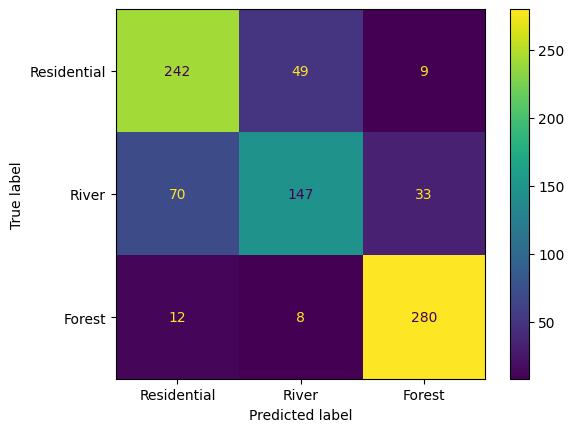

{'Confusion Matrix': array([[242,  49,   9],
       [ 70, 147,  33],
       [ 12,   8, 280]], dtype=int64), 'Accuracy': 0.7870588235294118, 'Average F1 Score': 0.774513220520133, 'F1 Scores': {'Residential': 0.7756410256410257, 'River': 0.6475770925110133, 'Forest': 0.9003215434083601}}


In [17]:

labels = ["Residential","River","Forest"]
def model_evaluation(y_true,y_predicted,labels):
    
    cm = confusion_matrix(y_true, y_predicted, labels=labels)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    cm_display.plot()
    plt.show()
    accuracy = accuracy_score(y_true, y_predicted)
    
 
    f1_scores = f1_score(y_true, y_predicted, labels=labels, average=None)
    

    avg_f1_score = np.mean(f1_scores)
    
   
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Average F1 Score': avg_f1_score,
        'F1 Scores': dict(zip(labels, f1_scores))
    }
    
    return results


model_eval = model_evaluation(y_true,y_predicted,labels)
print(model_eval)
    
   

In [18]:

from sklearn.naive_bayes import GaussianNB
train_data = np.concatenate((train_residual,train_river,train_forest), axis=0)
train_labels = np.concatenate((train_residual_labels,train_river_labels ,train_forest_labels), axis=0)

test_data = np.concatenate((test_residual,test_river,test_forest), axis=0)
test_labels = np.concatenate((test_residual_labels,test_river_labels ,test_forest_labels), axis=0)
train_data=train_data.reshape(train_data.shape[0],-1)
test_data=train_data.reshape(test_data.shape[0],-1)


print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

pca = PCA(n_components=50)
train_data = pca.fit_transform(train_data)
test_data=pca.fit_transform(test_data)

clf = GaussianNB()
clf.fit(train_data,train_labels)
predictions = clf.predict(test_data)

accuracy = accuracy_score(test_labels,predictions)*100
print("accuracy = ",accuracy)

(7650, 53248)
(7650,)
(850, 479232)
(850,)
accuracy =  29.411764705882355


In [19]:
print(forest_labels)

['Forest' 'Forest' 'Forest' ... 'Forest' 'Forest' 'Forest']


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!


# Report Accuracy and Average F1 Score

### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (2 Marks)**
   - Correctly loads images for the residential, river, and forest classes. (0.5 Marks)
   - Accurately splits the dataset into training and testing subsets and clearly shows this split. (1.5 Marks)

2. **Feature Extraction (2 Marks)**
   - Implements feature extraction appropriately, considering the curse of dimensionality. (1 Mark)
   - Extracts and justifies the selection of features relevant to distinguishing the classes. (1 Mark)

3. **Implementation of MLE Classifier (3 Marks)**
   - Correctly calculates and clearly shows class priors and class-specific parameters. (1 Mark)
   - Accurately computes likelihoods using the likelihood equation (probability density function) and classifies based on maximum likelihood. Must clearly show these calculations and explain the choice of likelihood equation. (2 Marks)

4. **Model Evaluation and Understanding (3 Marks)**
   - Shows **confusion matrix** and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score. (1 Mark)
   - **Comparison amongst your peers.** Compares the model's performance against those of peers to identify strengths and areas for improvement. (2 Marks)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.


In [20]:
import numpy as np

def compute_covariance_matrix(images):
    """
    Compute the covariance matrix of a set of multispectral images.

    Args:
    - images: A 4D NumPy array representing the multispectral images.
              Shape: (num_images, height, width, num_bands)

    Returns:
    - covariance_matrix: The covariance matrix of the images.
                         Shape: (num_bands, num_bands)
    """
    # Reshape the images into a 2D array where each row represents a pixel
    # and each column represents a spectral band across all images
    flattened_images = images.reshape(-1, images.shape[-1])

    # Compute the mean vector
    mean_vector = np.mean(flattened_images, axis=0)

    # Compute the deviation matrix
    deviation_matrix = flattened_images - mean_vector

    # Compute the covariance matrix
    covariance_matrix = np.dot(deviation_matrix.T, deviation_matrix) / flattened_images.shape[0]

    return mean_vector,covariance_matrix

# mean_vector,covariance_matrix = compute_covariance_matrix(train_forest)

residual_mean ,residula_covariance= compute_covariance_matrix(train_residual)
river_mean,river_covariance = compute_covariance_matrix(train_river)
forest_mean ,forest_covariance = compute_covariance_matrix(train_forest)

print("residual_mean",residual_mean)
print("residual_covariance",residula_covariance)

print("river_mean",river_mean)
print("river_covariance",river_covariance)

print("forest_mean",forest_mean)
print("forest_covariance",forest_covariance)
    
# Example usage:
# Assume 'images' is a 4D NumPy array representing multispectral images
# Shape: (num_images, height, width, num_bands)

# covariance_matrix = compute_covariance_matrix(images)

residual_mean [1459.61242793 1214.69271783 1114.49102286 1075.57527226 1287.8791107
 1980.4978606  2286.60519052 2186.58596354  664.42014061   12.281757
 1974.84656675 1382.01246672 2469.38278881]
residual_covariance [[ 3.57945829e+04  3.92181517e+04  3.87543277e+04  5.35053553e+04
   4.38704179e+04  1.15200703e+04  7.98434959e+02 -2.89562782e+03
  -8.18209467e+02  2.60394243e+02  3.50446061e+04  4.26927640e+04
  -5.23264488e+03]
 [ 3.92181517e+04  8.20506299e+04  8.86914376e+04  1.21315270e+05
   7.97915141e+04  3.52735197e+04  2.15865162e+04  2.70166056e+04
   4.07303061e+03  3.09034212e+02  7.78723417e+04  8.40210022e+04
   1.39662374e+04]
 [ 3.87543277e+04  8.86914376e+04  1.08880401e+05  1.49565814e+05
   1.07117174e+05  7.14595596e+04  6.23862696e+04  7.50750993e+04
   1.48199119e+04  3.63162521e+02  1.21920448e+05  1.17441084e+05
   5.76749321e+04]
 [ 5.35053553e+04  1.21315270e+05  1.49565814e+05  2.28951429e+05
   1.60875305e+05  9.41047467e+04  7.61757529e+04  8.37175509e+04


# test by feature extraction (PCA)

In [21]:


       
def performPCA(class_array): 
    new_class=[]
    for image in class_array:
        pca = PCA(n_components=train_residual.shape[2])
        pca = pca.fit(image)
        covariance_matrix = pca.get_covariance()
        eigen_values = pca.explained_variance_
        eigen_vectors = pca.components_

        # print("covariance matrix is\n",covariance_matrix)
        # print("eigen value is\n",eigen_values)
        # print("eigen vectors is\n",eigen_vectors)
        # print("as we see that the covariance matrix of the input is a symmetric matrix  ")
        # print("and as we see the eigen vectors are 13 vector and each vector is 1*13 ")
        # print("the eigen values are 13 numbers that then will represent thr covariance matrix of the output image")

        # # TODO: State the percentage of variance covered and provide commentary on its significance.
        # plt.plot(np.cumsum(pca.explained_variance_ratio_))
        # plt.xlabel('Number of Principal Components')
        # plt.ylabel('accumulative eigen values ratio')
        # plt.title('Screen Plot of Eigen values percentage')
        # plt.show()
        # print("explained variance ratio\n")
        # print(pca.explained_variance_ratio_)
        # print("the percentage of variance covered:",np.cumsum(pca.explained_variance_ratio_[:3])[2]*100,'%' )
        image_pca=pca.transform(image)
        num_components_to_keep = 4
        image_pca_truncated = image_pca[:, :num_components_to_keep]
        new_class.append(image_pca_truncated)
    # print("covariance matrix is\n",covariance_matrix)
    # print("eigen value is\n",eigen_values)
    # print("eigen vectors is\n",eigen_vectors)
    # print("as we see that the covariance matrix of the input is a symmetric matrix  ")
    # print("and as we see the eigen vectors are 13 vector and each vector is 1*13 ")
    # print("the eigen values are 13 numbers that then will represent thr covariance matrix of the output image")

    # # TODO: State the percentage of variance covered and provide commentary on its significance.
    # plt.plot(np.cumsum(pca.explained_variance_ratio_))
    # plt.xlabel('Number of Principal Components')
    # plt.ylabel('accumulative eigen values ratio')
    # plt.title('Screen Plot of Eigen values percentage')
    # plt.show()
    # print("explained variance ratio\n")
    # print(pca.explained_variance_ratio_)
    # print("the percentage of variance covered:",np.cumsum(pca.explained_variance_ratio_[:3])[2]*100,'%' )    
    return new_class






In [22]:
residual_train_feature_extraction = performPCA(train_residual)
river_train_feature_extraction = performPCA(train_river)
forest_train_feature_extraction = performPCA(train_forest)


residual_test_feature_extraction = performPCA(test_residual)
river_test_feature_extraction = performPCA(test_river)
forest_test_feature_extraction = performPCA(test_forest)

In [23]:
# residual_train_feature_extraction
# river_train_feature_extraction
# forest_train_feature_extraction

# residual_test_feature_extraction
# river_test_feature_extraction
# forest_test_feature_extraction


residual_mean ,residula_covariance= Estimate_Class_specific_Parameters(np.array(residual_train_feature_extraction))
river_mean,river_covariance = Estimate_Class_specific_Parameters(np.array(river_train_feature_extraction))
forest_mean ,forest_covariance = Estimate_Class_specific_Parameters(np.array(forest_train_feature_extraction))


In [24]:
y_true =[]
y_predicted = []

for image in residual_test_feature_extraction:
    y_predicted.append(Classify_Based_on_Maximum_Likelihood(image,residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))
    y_true.append("Residential")
    
for image in river_test_feature_extraction:
    y_predicted.append(Classify_Based_on_Maximum_Likelihood(image,residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))
    y_true.append("River")   
    
    
for image in forest_test_feature_extraction:
    y_predicted.append(Classify_Based_on_Maximum_Likelihood(image,residual_mean ,residula_covariance,river_mean,river_covariance,forest_mean ,forest_covariance ,p_residual,p_river,p_forest))
    y_true.append("Forest")     

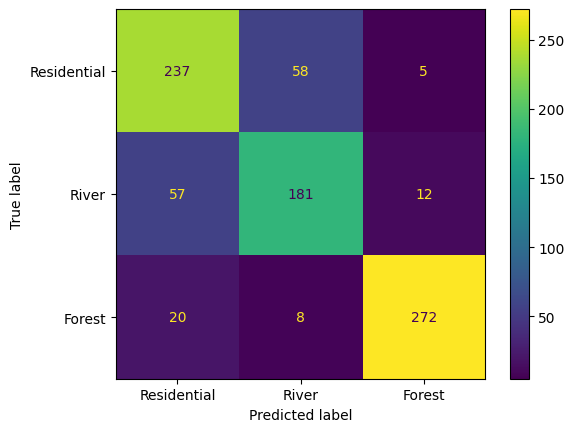

{'Confusion Matrix': array([[237,  58,   5],
       [ 57, 181,  12],
       [ 20,   8, 272]], dtype=int64), 'Accuracy': 0.8117647058823529, 'Average F1 Score': 0.8079855042982863, 'F1 Scores': {'Residential': 0.7719869706840391, 'River': 0.7283702213279678, 'Forest': 0.9235993208828522}}


In [25]:
labels = ["Residential","River","Forest"]
def model_evaluation(y_true,y_predicted,labels):
    
    cm = confusion_matrix(y_true, y_predicted, labels=labels)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    cm_display.plot()
    plt.show()
    accuracy = accuracy_score(y_true, y_predicted)
    
 
    f1_scores = f1_score(y_true, y_predicted, labels=labels, average=None)
    

    avg_f1_score = np.mean(f1_scores)
    
   
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Average F1 Score': avg_f1_score,
        'F1 Scores': dict(zip(labels, f1_scores))
    }
    
    return results


model_eval = model_evaluation(y_true,y_predicted,labels)
print(model_eval)

# View pca adding features and curse of dimensionality

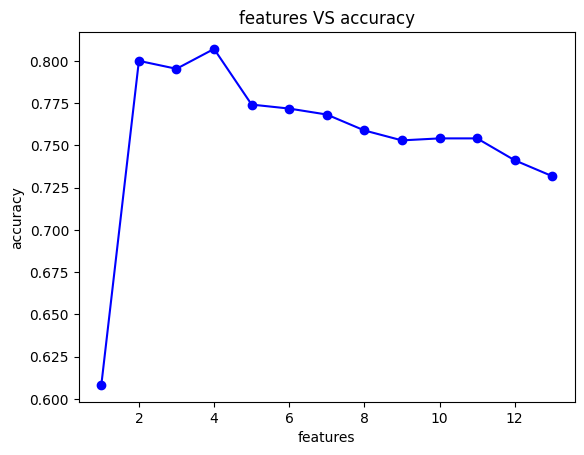

In [26]:
features_accuracy = {1:0.6082352941176471,2:0.8,3:0.7952941176470588,4:0.8070588235294117,5:0.7741176470588236,6:0.7717647058823529,7:0.768235294117647,8:0.7588235294117647,9:0.7529411764705882,10:0.7541176470588236,11:0.7541176470588236,12:0.7411764705882353,13:0.731764705882353}
# Extract keys and values
keys = list(features_accuracy.keys())
values = list(features_accuracy.values())

# Plotting
plt.plot(keys, values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('features')
plt.ylabel('accuracy')
plt.title('features VS accuracy')

# Display the plot
plt.show()

**it seems that the best number of features to use is 4**

# feature extraction by hog